1
2
3
4
5


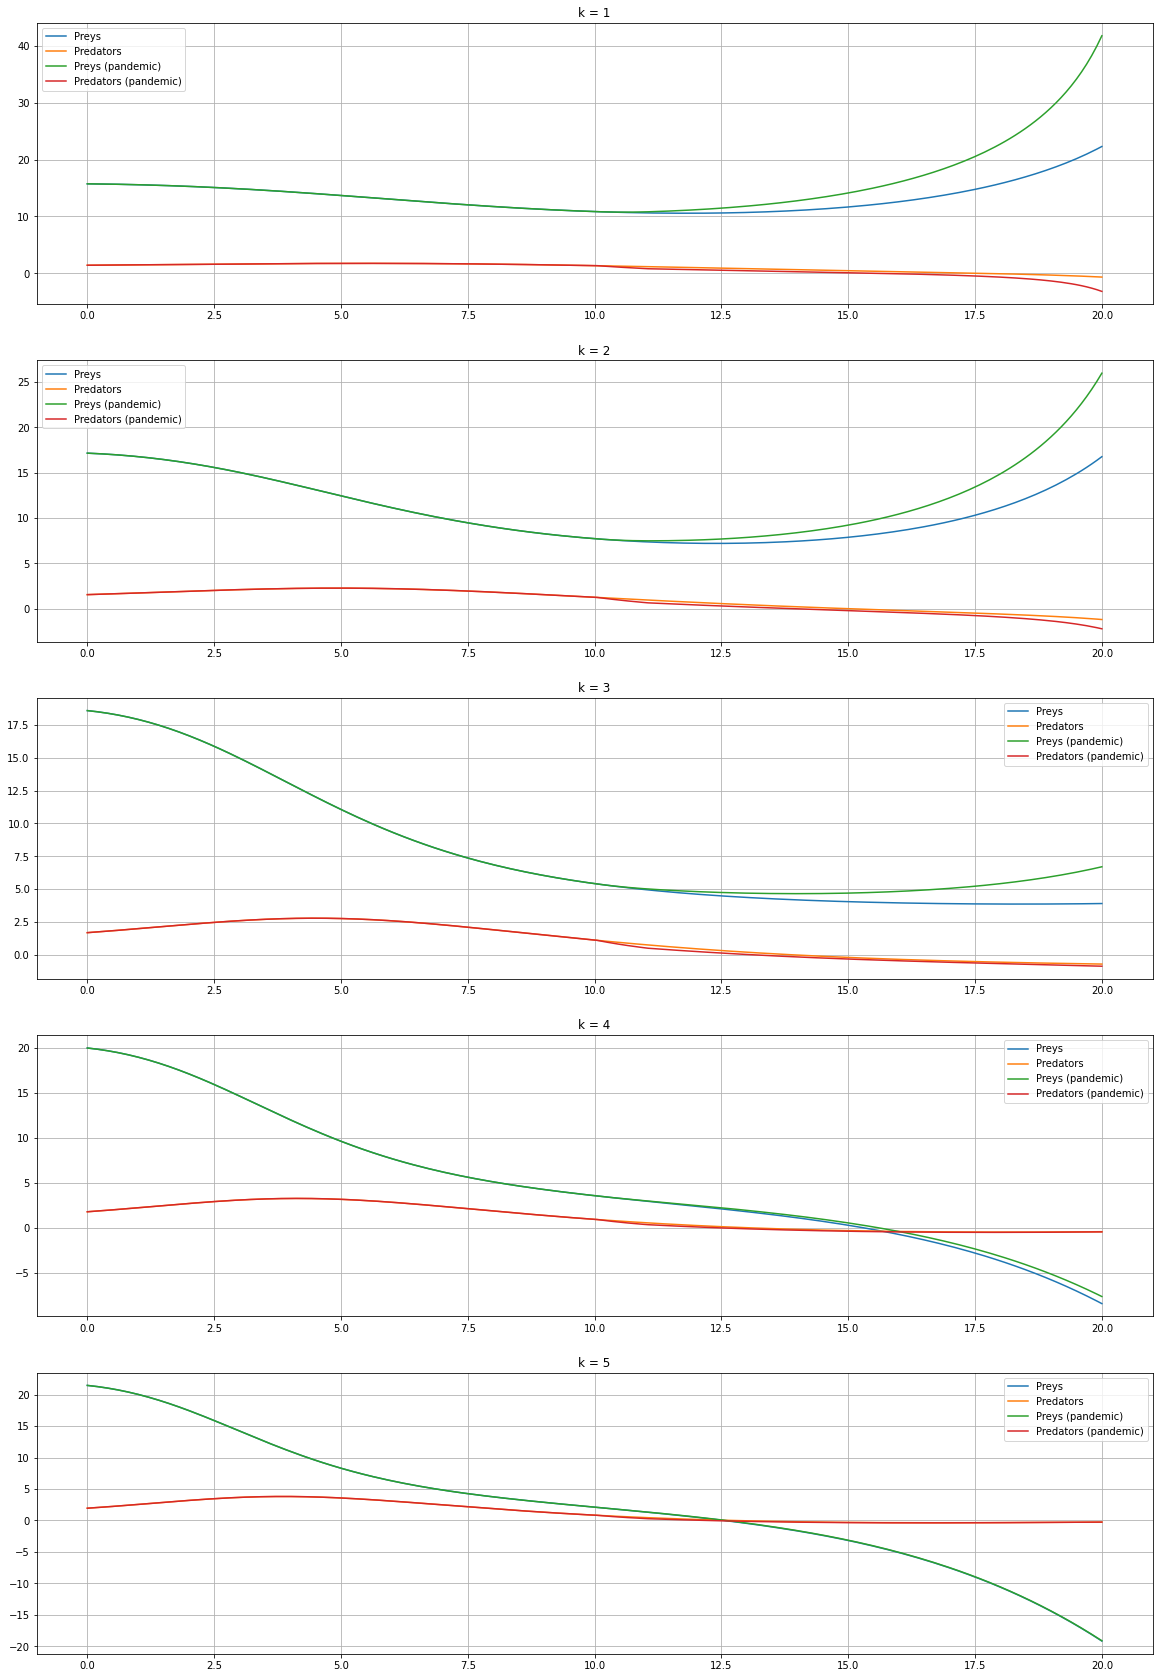

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def myModel(y, t, isPandemic: bool = False):
    # Parameters
    alpha = 0.2
    beta  = 0.1
    gamma = 1/3
    delta = gamma/10

    # Human intervention parameters
    uPrey = 1
    uPred = 0.2

    if isPandemic:
        if t >= 10 and t <= 11:
            gamma = (1/3)*2    

    # get the individual variables - for readability
    yPrey = y[0]
    yPred = y[1]

    # individual derivatives
    dyPreydt  =   alpha * yPrey - beta  * yPrey * yPred - uPrey
    dyPreddt  = - gamma * yPred + delta * yPrey * yPred - uPred
    
    return [ dyPreydt, dyPreddt ]


def euler_solver(model, n, y0, t0, tmax, isPandemic: bool = False):
    # Create arrays for model
    y1 = []
    y2 = []
    
    # Compute step length
    h = (tmax-t0)/n
    
    # Compute t
    t = np.linspace(t0, tmax, n)

    # Add initial conditions to array
    y1.append(y0[0])
    y2.append(y0[1])
    for i in range(n-1):
        y_new = model([y1[i], y2[i]], t[i], isPandemic)
        y1.append(y1[i] + h*y_new[0])
        y2.append(y2[i] + h*y_new[1])
    
    return t, [y1, y2]


# Initialverdi - equilibrium
yeq = [14.3, 1.3]

# Antall steg
n = 200

# Start/stopp-tidspunkt
t0 = 0
tmax = 20

fig = plt.figure(figsize=(20,30))

for k in range(1,6):
    k_factor = (1+0.1*k)
    y0 = [k_factor*yeq[0], k_factor*yeq[1]]

    # Compute y_prey and y_pred without pandemic
    t, y = euler_solver(model=myModel, n=n, y0=y0, t0=t0, tmax=tmax, isPandemic=False)
    yPrey = y[0]
    yPred = y[1]

    # Compute y_prey and y_pred with pandemic
    t, y_pd = euler_solver(model=myModel, n=n, y0=y0, t0=t0, tmax=tmax, isPandemic=True)
    yPrey_pd = y_pd[0]
    yPred_pd = y_pd[1]

    fig.add_subplot(5,1,k)
    plt.plot(t,yPrey, label='Preys', )
    plt.plot(t,yPred, label='Predators')
    plt.plot(t,yPrey_pd, label='Preys (pandemic)')
    plt.plot(t,yPred_pd, label='Predators (pandemic)')
    plt.legend()
    plt.grid()
    plt.title(f'k = {k}')

plt.show()